# Fire/Smoke Detection Model Draft
Emily Donofrio

### Set up

In [35]:
import keras
import pandas as pd
import numpy

In [7]:
image_folder = 'images/'
full_data_path = 'image_data_full.csv'

In [3]:
sample_data = pd.read_csv('image_data_sample.csv')

In [4]:
sample_data.shape

(9531, 6)

In [5]:
sample_data.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/neitherFireNorSmoke_CV022026.jpg,690,714,neither,0.966387,492660
1,images/neitherFireNorSmoke_CV004700.jpg,325,450,neither,0.722222,146250
2,images/bothFireAndSmoke_CV014234.jpg,512,384,both,1.333333,196608
3,images/neitherFireNorSmoke_CV028776.jpg,524,650,neither,0.806154,340600
4,images/neitherFireNorSmoke_CV007468.jpg,800,533,neither,1.500938,426400


In [8]:
df = pd.read_csv(full_data_path)
df.shape

(95314, 6)

### Preprocessing

In [9]:
df = df.sort_values(by='image_path').reset_index(drop=True)

In [12]:
# map class labels to integers
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [46]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [14]:
image_size = (180, 180)

dsTrain, dsTest = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['class'].tolist(), # Pass the sorted list of labels
    label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 4 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


### Model 1: Predicting the 4 classes - dense sequential

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    min_delta=0.001,     # Minimum change to qualify as improvement
    verbose=2,           # Display messages when callback takes action
    restore_best_weights=True # Restore weights from the best epoch
)

In [28]:
# build a simple model
model1 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(4, activation="sigmoid")
 ])

In [29]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │     2,592,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,592,084 (9.89 MB)

 Trainable params: 2,592,084 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model1.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model1.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
424/596 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - accuracy: 0.4369 - loss: 1738.1563

596/596 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - accuracy: 0.5187 - loss: 523.3415 - val_accuracy: 0.5758 - val_loss: 4.0953
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 98s 163ms/step - accuracy: 0.5187 - loss: 523.3415 - val_accuracy: 0.5758 - val_loss: 4.0953
Epoch 2/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.5764 - loss: 2.0534

596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.5917 - loss: 1.1702 - val_accuracy: 0.6282 - val_loss: 0.6026
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.5917 - loss: 1.1702 - val_accuracy: 0.6282 - val_loss: 0.6026
Epoch 3/10
436/596 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.6564 - loss: 0.4912

596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 161ms/step - accuracy: 0.6635 - loss: 0.4551 - val_accuracy: 0.6433 - val_loss: 0.5227
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 96s 161ms/step - accuracy: 0.6635 - loss: 0.4551 - val_accuracy: 0.6433 - val_loss: 0.5227
Epoch 4/10
428/596 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.6916 - loss: 0.3889

596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.6965 - loss: 0.3712 - val_accuracy: 0.6530 - val_loss: 0.5260
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.6965 - loss: 0.3712 - val_accuracy: 0.6530 - val_loss: 0.5260
Epoch 5/10
428/596 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.7207 - loss: 0.3361

596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7234 - loss: 0.3320 - val_accuracy: 0.6524 - val_loss: 0.5857
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 92s 154ms/step - accuracy: 0.7234 - loss: 0.3320 - val_accuracy: 0.6524 - val_loss: 0.5857
Epoch 6/10
435/596 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7445 - loss: 0.3170

596/596 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.7468 - loss: 0.3105 - val_accuracy: 0.6662 - val_loss: 0.5844
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 100s 167ms/step - accuracy: 0.7468 - loss: 0.3105 - val_accuracy: 0.6662 - val_loss: 0.5844
Epoch 7/10
436/596 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7663 - loss: 0.2801

596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 155ms/step - accuracy: 0.7679 - loss: 0.2842 - val_accuracy: 0.6661 - val_loss: 0.6299
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 93s 155ms/step - accuracy: 0.7679 - loss: 0.2842 - val_accuracy: 0.6661 - val_loss: 0.6299
Epoch 8/10
432/596 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.7850 - loss: 0.2717

596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.7842 - loss: 0.2676 - val_accuracy: 0.6732 - val_loss: 0.6724
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
596/596 ━━━━━━━━━━━━━━━━━━━━ 91s 152ms/step - accuracy: 0.7842 - loss: 0.2676 - val_accuracy: 0.6732 - val_loss: 0.6724
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


In [33]:
import sklearn.metrics

In [34]:
predTrainN1 = model1.predict( dsTrain )
predTestN1 = model1.predict( dsTest )

447/596 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 62s 104ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step


In [39]:
y_pred_train = numpy.argmax(predTrainN1, axis=1)
y_pred_test  = numpy.argmax(predTestN1, axis=1)

In [41]:
# Extract labels from dsTrain for use in metrics
y_train = []
for images, labels in dsTrain:
    y_train.extend(labels.numpy())

# Extract labels from dsTest
y_test = []
for images, labels in dsTest:
    y_test.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)

# Convert one-hot encoded labels to class indices
y_train = numpy.argmax(y_train, axis=1)
y_test = numpy.argmax(y_test, axis=1)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Unique values in y_train:", numpy.unique(y_train))
print("Unique values in y_test:", numpy.unique(y_test))

Shape of y_train: (76252,)
Shape of y_test: (19062,)
Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


2026-02-09 01:45:32.686974: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test) )

0.2500184363852962
0.5562590555883185


In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



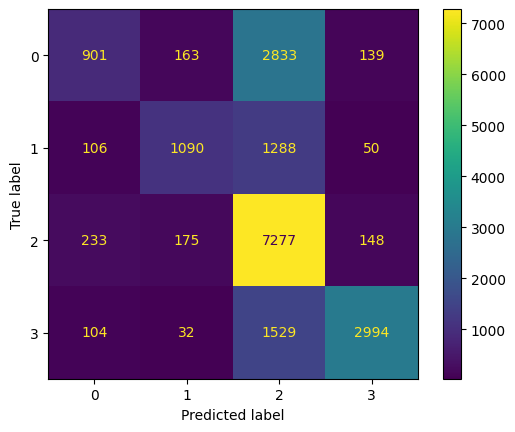

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [56]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.22      0.33      4036
           1       0.75      0.43      0.55      2534
           2       0.56      0.93      0.70      7833
           3       0.90      0.64      0.75      4659

    accuracy                           0.64     19062
   macro avg       0.72      0.56      0.58     19062
weighted avg       0.69      0.64      0.61     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}
<br> <br>
Notes: <br>
- high recall in 'neither' category, lowest precision
- highest precision in smoke
- very low recall for 'both' category, most miscategorized 'both' are being predicted as 'neither'
- odd that training accuracy is much lower than test accuracy, may indicate volatility and not true model performance

### Model 2: Predicting the 4 classes - convolutional layers

In [47]:
model2 = keras.Sequential(
    [
        keras.Input(shape=image_size + (3,) ),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense( 4, activation="sigmoid"),
    ]
)

In [48]:
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │       473,348 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,740 (1.88 MB)

 Trainable params: 492,740 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model2.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
model2.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
450/596 ━━━━━━━━━━━━━━━━━━━━ 1:35 651ms/step - accuracy: 0.5579 - loss: 27.6124

596/596 ━━━━━━━━━━━━━━━━━━━━ 424s 710ms/step - accuracy: 0.5735 - loss: 4.3908 - val_accuracy: 0.5996 - val_loss: 0.4736
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 424s 710ms/step - accuracy: 0.5735 - loss: 4.3908 - val_accuracy: 0.5996 - val_loss: 0.4736
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 7:19 3s/step - accuracy: 0.5908 - loss: 1.0342

596/596 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/step - accuracy: 0.5942 - loss: 1.0206 - val_accuracy: 0.6220 - val_loss: 0.4230
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1435s 2s/step - accuracy: 0.5942 - loss: 1.0206 - val_accuracy: 0.6220 - val_loss: 0.4230
Epoch 3/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 1:39 637ms/step - accuracy: 0.6074 - loss: 0.9334

596/596 ━━━━━━━━━━━━━━━━━━━━ 417s 699ms/step - accuracy: 0.6050 - loss: 1.0754 - val_accuracy: 0.5863 - val_loss: 0.4343
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 417s 699ms/step - accuracy: 0.6050 - loss: 1.0754 - val_accuracy: 0.5863 - val_loss: 0.4343
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 7:17 3s/step - accuracy: 0.6106 - loss: 3.8799

596/596 ━━━━━━━━━━━━━━━━━━━━ 1396s 2s/step - accuracy: 0.6079 - loss: 3.7239 - val_accuracy: 0.6083 - val_loss: 0.4139
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1396s 2s/step - accuracy: 0.6079 - loss: 3.7239 - val_accuracy: 0.6083 - val_loss: 0.4139
Epoch 5/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 6:58 3s/step - accuracy: 0.6024 - loss: 6.7211

596/596 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.6083 - loss: 4.3448 - val_accuracy: 0.6022 - val_loss: 0.4173
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1361s 2s/step - accuracy: 0.6083 - loss: 4.3448 - val_accuracy: 0.6022 - val_loss: 0.4173
Epoch 6/10
462/596 ━━━━━━━━━━━━━━━━━━━━ 6:36 3s/step - accuracy: 0.6154 - loss: 1.6460

596/596 ━━━━━━━━━━━━━━━━━━━━ 1502s 3s/step - accuracy: 0.6176 - loss: 1.8564 - val_accuracy: 0.6207 - val_loss: 0.4146
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1502s 3s/step - accuracy: 0.6176 - loss: 1.8564 - val_accuracy: 0.6207 - val_loss: 0.4146
Epoch 7/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 7:57 3s/step - accuracy: 0.6186 - loss: 3.2027

596/596 ━━━━━━━━━━━━━━━━━━━━ 1496s 3s/step - accuracy: 0.6162 - loss: 2.3132 - val_accuracy: 0.6127 - val_loss: 0.4242
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 1496s 3s/step - accuracy: 0.6162 - loss: 2.3132 - val_accuracy: 0.6127 - val_loss: 0.4242
Epoch 8/10
439/596 ━━━━━━━━━━━━━━━━━━━━ 1:56 740ms/step - accuracy: 0.6255 - loss: 1.3554

596/596 ━━━━━━━━━━━━━━━━━━━━ 542s 910ms/step - accuracy: 0.6224 - loss: 4.4119 - val_accuracy: 0.6226 - val_loss: 0.4281
Epoch 9/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 542s 910ms/step - accuracy: 0.6224 - loss: 4.4119 - val_accuracy: 0.6226 - val_loss: 0.4281
Epoch 9/10
454/596 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.6266 - loss: 0.9614

596/596 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.6256 - loss: 3.3587 - val_accuracy: 0.5995 - val_loss: 1.4217
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.
596/596 ━━━━━━━━━━━━━━━━━━━━ 656s 1s/step - accuracy: 0.6256 - loss: 3.3587 - val_accuracy: 0.5995 - val_loss: 1.4217
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 4.


In [51]:
predTrainN2 = model2.predict( dsTrain )
predTestN2 = model2.predict( dsTest )

441/596 ━━━━━━━━━━━━━━━━━━━━ 34s 225ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 131s 220ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 131s 220ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 31s 204ms/step


In [52]:
y_pred_train2 = numpy.argmax(predTrainN2, axis=1)
y_pred_test2  = numpy.argmax(predTestN2, axis=1)

In [53]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train2) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test2) )

0.249114201215435
0.510697563777683


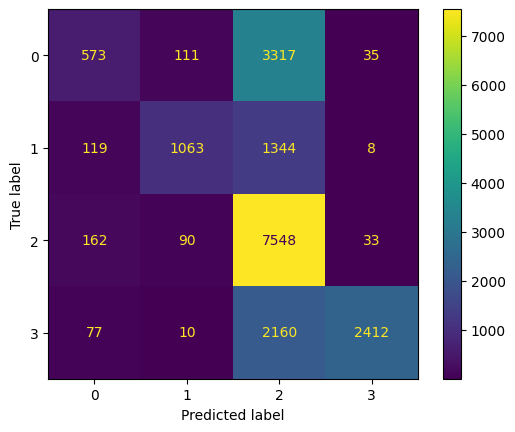

In [54]:
cm = confusion_matrix(y_test, y_pred_test2)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [55]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.62      0.14      0.23      4036
           1       0.83      0.42      0.56      2534
           2       0.53      0.96      0.68      7833
           3       0.97      0.52      0.67      4659

    accuracy                           0.61     19062
   macro avg       0.74      0.51      0.54     19062
weighted avg       0.69      0.61      0.57     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

Notes:
- 'Neither' still highest recall
- 'Both' being categorized as neither seems to have only gotten worse with this model than the prior model
- Smoke precision increased but in turn recall decreased
- Overall, this model seems to have increased precision in all the positive classes (either smoke, fire, or both) but decreased recall
- Training accuracy still lower than test accuracy (by a lot) which doesn't lend me confidence on true model performance

### Model 3: Predicting Smoke

In [58]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600


In [59]:
# smoke mapping
print(class_mapping)
smoke_mapping = {0: 1, 1: 0, 2: 0, 3: 1}
df['smoke_class'] = df['class'].map(smoke_mapping)
df[['class', 'smoke_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  smoke_class
2      0              39199
3      1              23414
0      1              20151
1      0              12550
Name: count, dtype: int64

In [81]:
dsTrain_smoke, dsTest_smoke = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['smoke_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [82]:
# build a simple model
model3 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [83]:
model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model3.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
model3.fit(dsTrain_smoke, epochs = 10, validation_data=dsTest_smoke, callbacks=[early_stopping])

Epoch 1/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.6401 - loss: 1324.6306

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.6789 - loss: 476.5115 - val_accuracy: 0.7169 - val_loss: 4.0056
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.6789 - loss: 476.5115 - val_accuracy: 0.7169 - val_loss: 4.0056
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.7241 - loss: 2.7498

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7148 - loss: 1.4815 - val_accuracy: 0.7297 - val_loss: 0.7349
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 137ms/step - accuracy: 0.7148 - loss: 1.4815 - val_accuracy: 0.7297 - val_loss: 0.7349
Epoch 3/10
471/596 ━━━━━━━━━━━━━━━━━━━━ 14s 113ms/step - accuracy: 0.7545 - loss: 0.5643

596/596 ━━━━━━━━━━━━━━━━━━━━ 80s 134ms/step - accuracy: 0.7611 - loss: 0.5346 - val_accuracy: 0.7397 - val_loss: 0.7182
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 80s 134ms/step - accuracy: 0.7611 - loss: 0.5346 - val_accuracy: 0.7397 - val_loss: 0.7182
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.7848 - loss: 0.4722

596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 150ms/step - accuracy: 0.7882 - loss: 0.4648 - val_accuracy: 0.7446 - val_loss: 0.8366
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 150ms/step - accuracy: 0.7882 - loss: 0.4648 - val_accuracy: 0.7446 - val_loss: 0.8366
Epoch 5/10
469/596 ━━━━━━━━━━━━━━━━━━━━ 16s 130ms/step - accuracy: 0.8102 - loss: 0.4130

596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.8112 - loss: 0.4073 - val_accuracy: 0.7501 - val_loss: 0.8468
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.8112 - loss: 0.4073 - val_accuracy: 0.7501 - val_loss: 0.8468
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [86]:
predTrainN3 = model3.predict( dsTrain_smoke )
predTestN3 = model3.predict( dsTest_smoke )

454/596 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step


In [ ]:
# Extract labels from dsTrain_smoke for use in metrics
y_train_smoke = []
for images, labels in dsTrain_smoke:
    y_train_smoke.extend(labels.numpy())

# Extract labels from dsTest
y_test_smoke = []
for images, labels in dsTest_smoke:
    y_test_smoke.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_smoke = numpy.array(y_train_smoke)
y_test_smoke = numpy.array(y_test_smoke)


print("Shape of y_train_smoke:", y_train_smoke.shape)
print("Shape of y_test_smoke:", y_test_smoke.shape)
print("Unique values in y_train_smoke:", numpy.unique(y_train_smoke))
print("Unique values in y_test_smoke:", numpy.unique(y_test_smoke))



Shape of y_train_smoke: (76252,)
Shape of y_test_smoke: (19062,)
Unique values in y_train_smoke: [0 1]
Unique values in y_test_smoke: [0 1]


In [ ]:
# look at ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN3)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7747836183209063


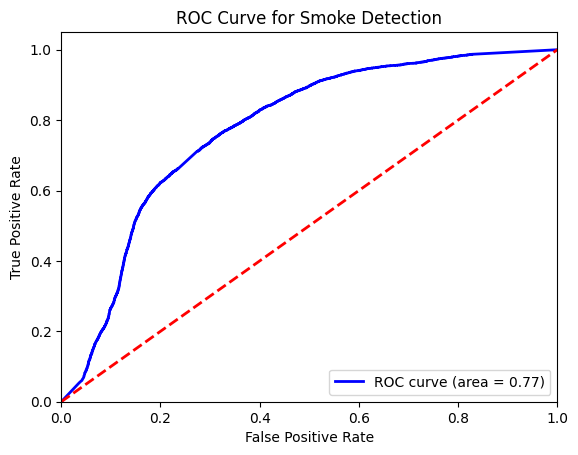

In [114]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# calculate precision and recall
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test_smoke, predTestN3)

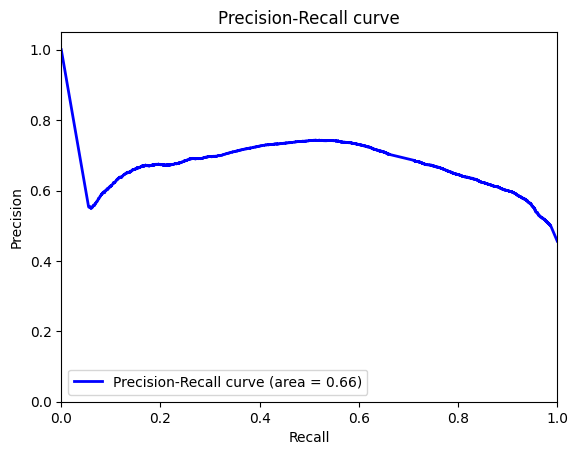

In [104]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [105]:
# pick best threshold based on F1 score
from sklearn.metrics import f1_score
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (predTestN3 >= thresh).astype(int)
    f1 = f1_score(y_test_smoke, y_pred_thresh)
    f1_scores.append(f1)

In [106]:
# pick threshold with highest F1 score
best_thresh = thresholds[numpy.argmax(f1_scores)]
print("Best threshold based on F1 score:", best_thresh)

Best threshold based on F1 score: 0.054591417


In [129]:
print( sklearn.metrics.balanced_accuracy_score( y_train_smoke, predTrainN3 >= best_thresh ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_smoke, predTestN3 >= best_thresh) )

0.5005068495468931
0.7046682108759199


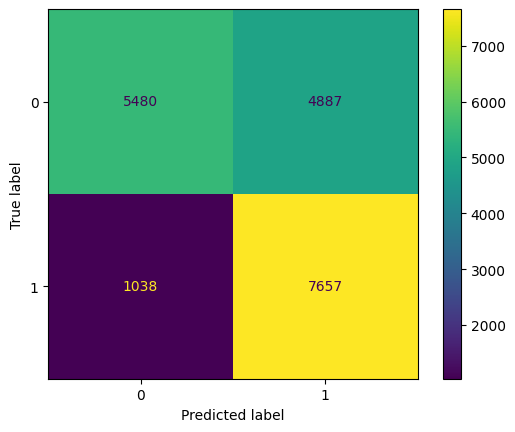

In [131]:
cm = confusion_matrix(y_test_smoke, predTestN3 > best_thresh)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [ ]:
# calculate precision, recall, f1-score
print(classification_report(y_test_smoke, predTestN3 >= best_thresh))

              precision    recall  f1-score   support

           0       0.84      0.53      0.65     10367
           1       0.61      0.88      0.72      8695

    accuracy                           0.69     19062
   macro avg       0.73      0.70      0.69     19062
weighted avg       0.74      0.69      0.68     19062



### Model 4: Predicting Fire

In [112]:
# fire mapping
print(class_mapping)
fire_mapping = {0: 1, 1: 1, 2: 0, 3: 0}
df['fire_class'] = df['class'].map(fire_mapping)
df[['class', 'fire_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  fire_class
2      0             39199
3      0             23414
0      1             20151
1      1             12550
Name: count, dtype: int64

In [113]:
dsTrain_fire, dsTest_fire = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['fire_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [115]:
# build a simple model
model4 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [116]:
model4.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [118]:
model4.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
model4.fit(dsTrain_fire, epochs = 10, validation_data=dsTest_fire, callbacks=[early_stopping])

Epoch 1/10
451/596 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.6605 - loss: 1621.6970

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.7052 - loss: 592.1354 - val_accuracy: 0.7314 - val_loss: 14.2510
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 136ms/step - accuracy: 0.7052 - loss: 592.1354 - val_accuracy: 0.7314 - val_loss: 14.2510
Epoch 2/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 17s 112ms/step - accuracy: 0.7486 - loss: 10.5099

596/596 ━━━━━━━━━━━━━━━━━━━━ 177s 298ms/step - accuracy: 0.7519 - loss: 5.9036 - val_accuracy: 0.7536 - val_loss: 1.7728
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 177s 298ms/step - accuracy: 0.7519 - loss: 5.9036 - val_accuracy: 0.7536 - val_loss: 1.7728
Epoch 3/10
455/596 ━━━━━━━━━━━━━━━━━━━━ 15s 112ms/step - accuracy: 0.7690 - loss: 1.3330

596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7622 - loss: 1.0404 - val_accuracy: 0.7477 - val_loss: 0.7700
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 83s 139ms/step - accuracy: 0.7622 - loss: 1.0404 - val_accuracy: 0.7477 - val_loss: 0.7700
Epoch 4/10
452/596 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.7846 - loss: 0.5960

596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.7847 - loss: 0.5651 - val_accuracy: 0.7458 - val_loss: 0.8508
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 157ms/step - accuracy: 0.7847 - loss: 0.5651 - val_accuracy: 0.7458 - val_loss: 0.8508
Epoch 5/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8111 - loss: 0.4695

596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.8128 - loss: 0.4739 - val_accuracy: 0.7609 - val_loss: 0.8704
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.8128 - loss: 0.4739 - val_accuracy: 0.7609 - val_loss: 0.8704
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [121]:
predTrainN4 = model4.predict( dsTrain_fire )
predTestN4 = model4.predict( dsTest_fire )

443/596 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 83ms/step


In [122]:
# Extract labels from dsTrain_fire for use in metrics
y_train_fire = []
for images, labels in dsTrain_fire:
    y_train_fire.extend(labels.numpy())

# Extract labels from dsTest
y_test_fire = []
for images, labels in dsTest_fire:
    y_test_fire.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_fire = numpy.array(y_train_fire)
y_test_fire = numpy.array(y_test_fire)

print("Shape of y_train_fire:", y_train_fire.shape)
print("Shape of y_test_fire:", y_test_fire.shape)
print("Unique values in y_train_fire:", numpy.unique(y_train_fire))
print("Unique values in y_test_fire:", numpy.unique(y_test_fire))


Shape of y_train_fire: (76252,)
Shape of y_test_fire: (19062,)
Unique values in y_train_fire: [0 1]
Unique values in y_test_fire: [0 1]


In [123]:
# look at ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN4)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6084467939223925


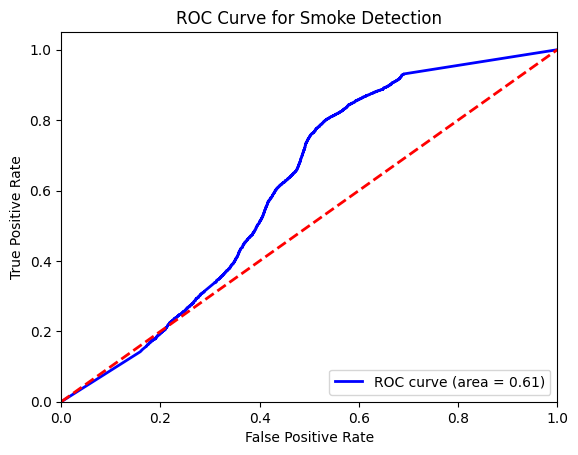

In [124]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [125]:
# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(
    y_test_fire, predTestN4)


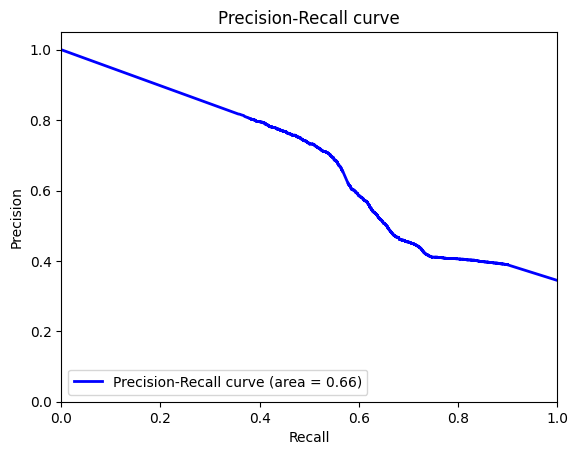

In [126]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [127]:
f1_scores_fire = []
for thresh in thresholds:
    y_pred_thresh = (predTestN4 >= thresh).astype(int)
    f1 = f1_score(y_test_fire, y_pred_thresh)
    f1_scores_fire.append(f1)

In [128]:
# pick threshold with highest F1 score
best_thresh_fire = thresholds[numpy.argmax(f1_scores_fire)]
print("Best threshold based on F1 score:", best_thresh_fire)

Best threshold based on F1 score: 0.5289487


In [130]:
print( sklearn.metrics.balanced_accuracy_score( y_train_fire, predTrainN4 >= best_thresh_fire ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_fire, predTestN4 >= best_thresh_fire) )

0.49914909833094273
0.7099304102570851


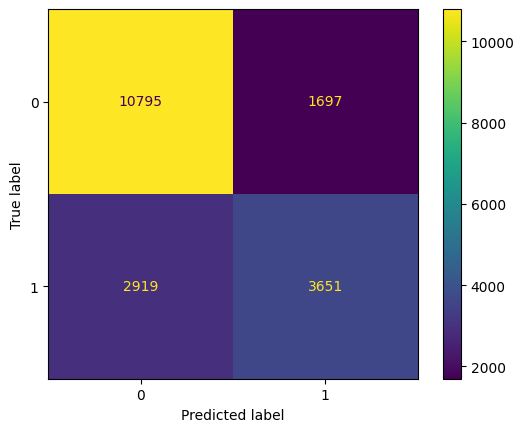

In [132]:
cm = confusion_matrix(y_test_fire, predTestN4 >= best_thresh_fire)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [133]:
# calculate precision, recall, f1-score
print(classification_report(y_test_fire, predTestN4 >= best_thresh_fire))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     12492
           1       0.68      0.56      0.61      6570

    accuracy                           0.76     19062
   macro avg       0.73      0.71      0.72     19062
weighted avg       0.75      0.76      0.75     19062



### Combining Model 3 & 4 predictions

In [135]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count,smoke_class,fire_class
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600,1,1
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600,1,1
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600,1,1
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600,1,1
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600,1,1


In [ ]:
df['smoke_score'] = 

ValueError: Length of values (19062) does not match length of index (95314)